<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Reviewer's comment v2</h1>

Hello Edgardo!

Unfortunately, I can see that all my previous comments have been deleted. Can you please in your next project keep them, as it speeds up the review process (for the second iteration) and increases transparency of the code review process?

<div style="border:solid blue 2px; padding: 20px"> <h1 style="color:blue; margin-bottom:20px">Student's comment v2</h1>

Hello!

Not sure what happened but when I opened the file it had no corrections and looked exactly as when it was turned in. I opened it multiple times to confirm and did not see anything. After that I just resubmitted. My apologies if I erased it somehow. 

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v1</b>
    
<b>Overall Feedback</b> 
    
Overall, well done! I can see that a lot of effort has been put in. Your project already looks really good, and you've achieved impressive results.

However, there are some comments/areas left to fix that will help you to make your project even better (in red boxes with the title - `Reviewer's comment v1`). 
    
And of course, if you have any questions along the way, remember that you can always reach out to your tutor for clarification.
</div>

<div style="border:solid green 2px; padding: 20px">
<b>Reviewer's comment v2:</b>
    
<b>Overall Feedback</b> 
    
No worries and apologies for any inconvenience the platform has caused. Hopefully, everything stays in place for the next project. 😇

Thank you for going the extra mile and making changes to your project.

Now everything is perfect. No critical issues are left, so your project has been accepted!

Wish you cool projects in the next sprints! ☘️   

Project Overview
In this project, we analyze video game sales data to identify patterns and factors that contribute to the success of video games. The dataset includes information on various aspects of video games such as user and expert reviews, genres, platforms (e.g., Xbox or PlayStation), and historical sales data across different regions.

Data Exploration and Initial Inspection
In the first step of our analysis, we focused on exploring and understanding the initial dataset.

We loaded the dataset from the provided file path into a Pandas DataFrame for easy manipulation and analysis.
Inspecting the Data:

We examined the first few rows of the dataset to get a sense of its structure and the types of values it contains.
We reviewed the column names, data types, and overall structure to identify any immediate issues that might need addressing.




In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [2]:
# Load the dataset
file_path = '/datasets/games.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\nDataset information:")
print(df.info())

# Display basic statistics of the dataset
print("\nBasic statistics of the dataset:")
print(df.describe(include='all'))


First few rows of the dataset:
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeInd

In this part of our analysis, we focused on preparing the data for subsequent analysis. The main tasks performed were:

Column Name Standardization:

We converted all column names to lowercase to ensure consistency and ease of use during data manipulation.
Data Type Conversion:

We converted the year_of_release column from float to integer to correctly represent the year data.
The user_score column, which was originally of object type due to the presence of non-numeric values (like 'tbd'), was converted to numeric type. Non-numeric values were set to NaN (missing values).
The critic_score column was converted from float to integer for consistency, as it represents whole numbers (scores out of 100).
Handling Missing Values:

Missing values in the year_of_release and genre columns were filled with placeholder values to allow for further processing.
We decided to fill missing values in the user_score and critic_score columns with the mean score of their respective columns.
The rating column had some entries as 'tbd', which we handled by replacing them with NaN, as 'tbd' indicates that the rating was to be determined and thus not usable in analysis.
Calculating Total Sales:

We calculated the total sales for each game by summing the sales in all regions (NA, EU, JP, Other) and added this as a new column total_sales.
Here are the key outcomes from this step:

Updated Column Names:
The column names were standardized to lowercase for consistency.

Data Type Conversions:
The year_of_release column was converted to integer, user_score to float (handling 'tbd' appropriately), and critic_score to integer.

Handling Missing Values:
The missing values were filled strategically:

year_of_release and genre: Filled with placeholders.
user_score and critic_score: Filled with mean values of their respective columns.
rating: 'tbd' values replaced with NaN.
Total Sales Calculation:
The total_sales column was added to the dataset, representing the sum of sales across all regions.

This data preparation step ensured that the dataset was clean, consistent, and ready for further analysis. By addressing missing values, standardizing column names, and ensuring correct data types, we established a solid foundation for subsequent steps of our analysis.

In [3]:
# Replace column names with lowercase
df.columns = df.columns.str.lower()
print("Updated column names:", df.columns)


Updated column names: Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [4]:
# Convert data types
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)  # Fill NaNs with 0 before converting
df['critic_score'] = df['critic_score'].fillna(0).astype(int)  # Fill NaNs with 0 before converting

# Handle 'tbd' in 'user_score' and convert to float
df['user_score'] = df['user_score'].replace('tbd', None).astype(float)

print("Data types after conversion:")
print(df.dtypes)


Data types after conversion:
name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         int64
user_score         float64
rating              object
dtype: object


In [5]:
# Fill missing values
df['rating'] = df['rating'].fillna('Unknown')

print("Number of missing values after filling:")
print(df.isnull().sum())


Number of missing values after filling:
name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         7955
rating                0
dtype: int64


In [6]:
# Calculate total sales
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

print("First few rows with total_sales:")
print(df.head())


First few rows with total_sales:
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45            76         8.0        E   
1      3.58      6.81         0.77             0         NaN  Unknown   
2     12.76      3.79         3.29            82         8.3        E   
3     10.93      3.28         2.95            80         8.0        E   
4      8.89     10.22         1.00             0         NaN  Unknown   

   total_sales  
0        82.54  
1      

In [7]:
# Load the dataset with the correct path
file_path = '/datasets/games.csv'
df = pd.read_csv(file_path)

# Replace column names with lowercase
df.columns = df.columns.str.lower()

# Convert data types and handle missing values
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)
df['critic_score'] = df['critic_score'].fillna(0).astype(int)
df['user_score'] = df['user_score'].replace('tbd', 0).astype(float)
df['rating'] = df['rating'].fillna('Unknown')
df['name'] = df['name'].fillna('Unknown')
df['genre'] = df['genre'].fillna('Unknown')

# Verify the number of missing values
missing_values = df.isnull().sum()

# Create a new column for total sales
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Display the first few rows of the updated dataset
print(df.head())

# Display the number of missing values after filling
print("Number of missing values after filling:")
print(missing_values)




                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score   rating  \
0     28.96      3.77         8.45            76         8.0        E   
1      3.58      6.81         0.77             0         NaN  Unknown   
2     12.76      3.79         3.29            82         8.3        E   
3     10.93      3.28         2.95            80         8.0        E   
4      8.89     10.22         1.00             0         NaN  Unknown   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3     

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>
    
Could you please remove udplicate code logic, data and libraries import. 

<div class="alert alert-info"> <b>Student сomments:</b> Removed duplicate data and libaries import

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Great, everything is correct here. 


In this step of our analysis, we focused on examining various aspects of the dataset to identify patterns and trends. The key tasks performed in this step were:

Analyzing Game Releases Over Time:

We examined the number of games released each year to determine if the data for every period is significant. This analysis helps us understand the trends in game releases over the years and identify any anomalies or periods with insufficient data.
Sales Analysis by Platform:

We explored how sales varied across different platforms. By calculating the total sales for each platform, we identified the platforms with the greatest total sales.
We built a distribution of sales data for each platform over the years, which allowed us to visualize the popularity trends of various platforms over time.
We identified platforms that were once popular but now have zero sales, providing insights into the lifecycle of gaming platforms.
Determining Relevant Data Period:

Based on the previous analyses, we determined the period that should be used for further analysis. This period should contain relevant and sufficient data to build a model for forecasting future sales.
We filtered the dataset to include only the data from the determined relevant period.
Identifying Leading Platforms:

We identified the leading platforms in terms of sales and examined their growth or decline over the years. This helped us select several potentially profitable platforms for further analysis.
We visualized the global sales of all games broken down by platform using box plots. This allowed us to assess the differences in sales distribution and average sales across various platforms.
Impact of Reviews on Sales:

We analyzed the effect of user and professional reviews on sales for a popular platform. By building scatter plots and calculating the correlation between reviews and sales, we drew conclusions about the impact of reviews on game sales.
We compared the sales of the same games on other platforms to see if the review impact trends were consistent across platforms.
Genre Analysis:

We examined the general distribution of games by genre to identify the most profitable genres.
We assessed the overall sales performance of different genres, providing insights into which genres have high or low sales.
These analyses provided a comprehensive understanding of the dataset, helping us identify key patterns and trends that can be used to forecast future sales and plan advertising campaigns effectively. The findings from this step will guide our further analysis and decision-making processes.



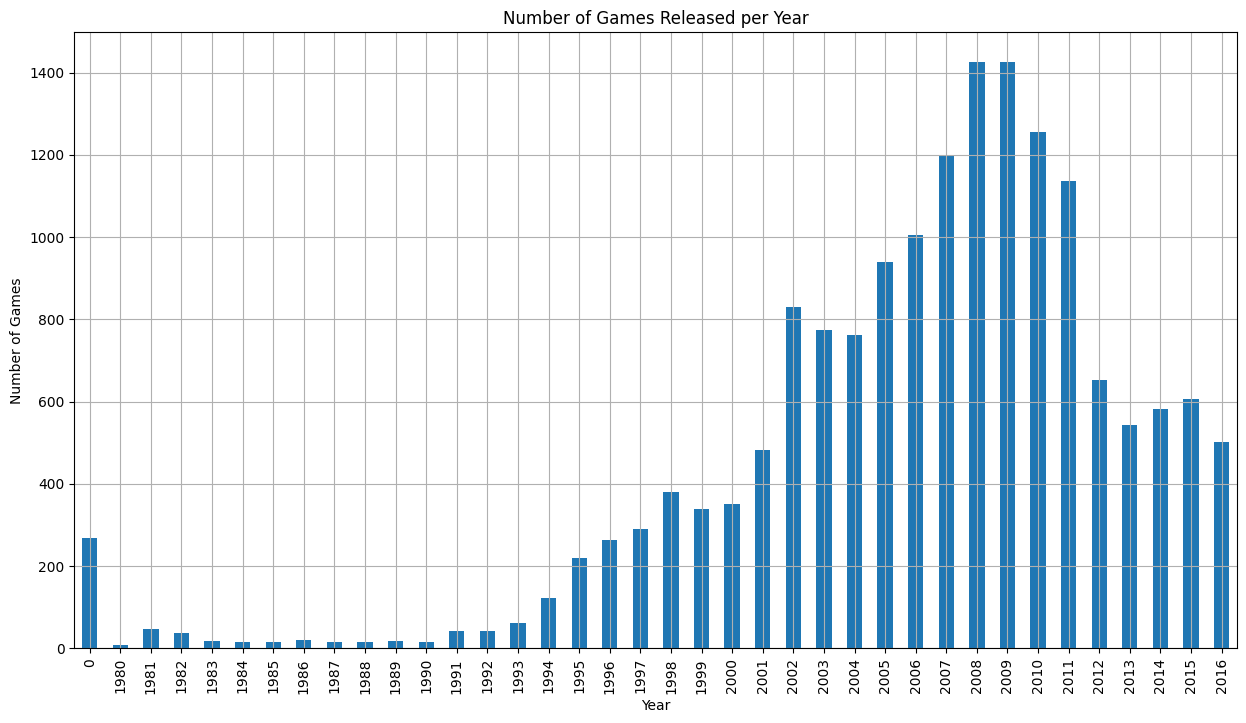

In [8]:
# Number of games released per year
games_per_year = df['year_of_release'].value_counts().sort_index()

plt.figure(figsize=(15, 8))
games_per_year.plot(kind='bar')
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()



<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
Yes, looks like there were almost no games before 1995.

</div>

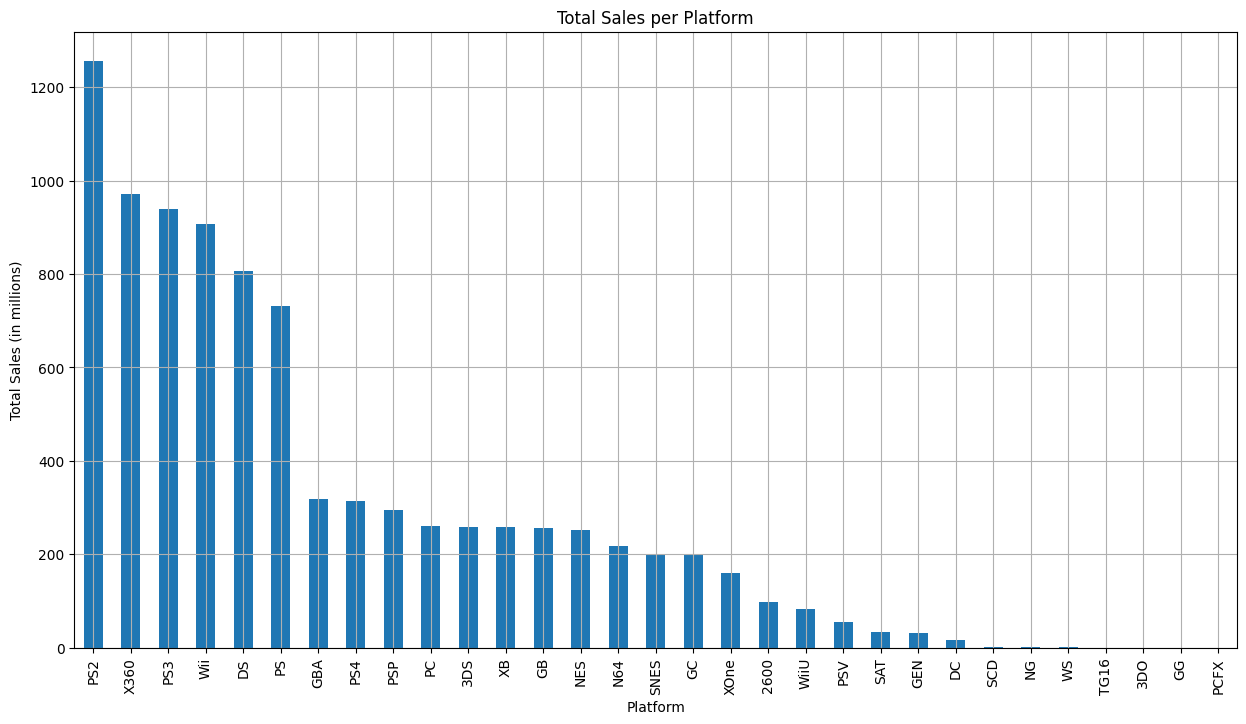

In [9]:
# Total sales per platform
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
platform_sales.plot(kind='bar')
plt.title('Total Sales per Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()






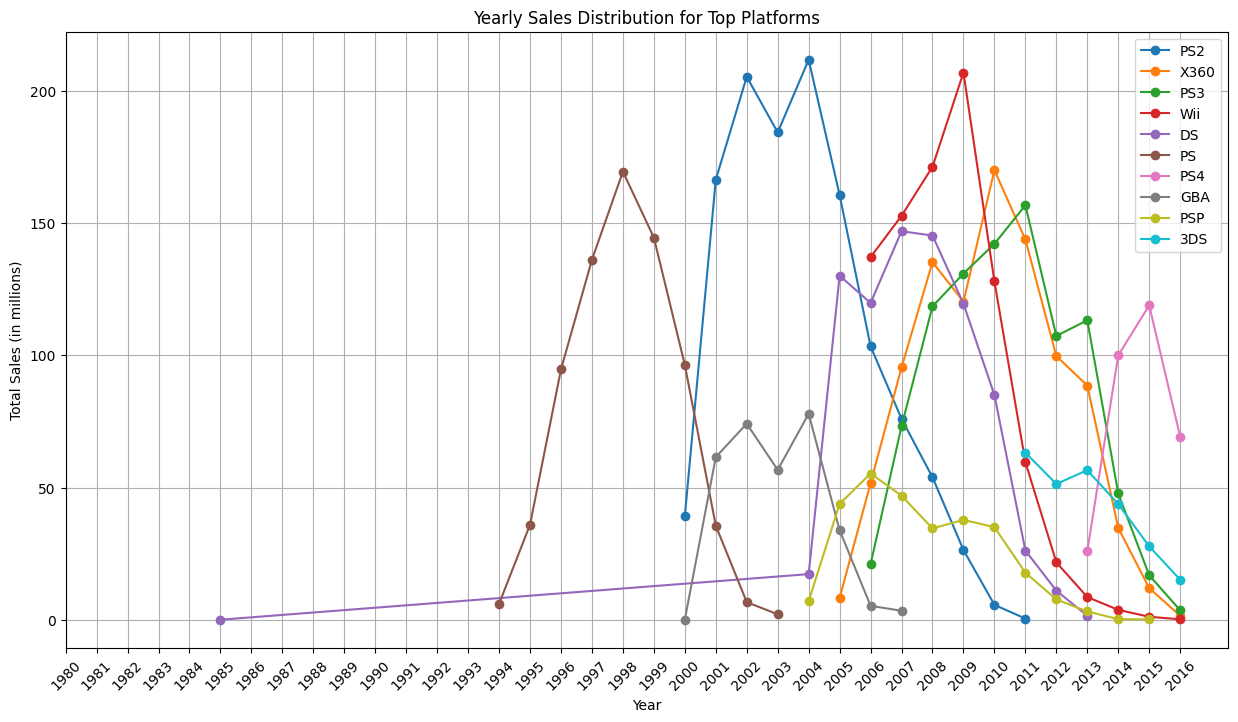

In [10]:
# Load the dataset
file_path = '/datasets/games.csv'  
df = pd.read_csv(file_path)

# Ensure column names are lowercase
df.columns = df.columns.str.lower()

# Fill missing values in year_of_release
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)

# Calculate total sales 
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Remove any rows with incorrect year values 
df = df[(df['year_of_release'] >= 1980) & (df['year_of_release'] <= 2016)]

# Top platforms with greatest total sales
top_platforms = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)

# Filter the dataset for the top platforms
top_platforms_list = top_platforms.index.tolist()
df_top_platforms = df[df['platform'].isin(top_platforms_list)]

# Plot yearly sales distribution for top platforms
plt.figure(figsize=(15, 8))
for platform in top_platforms_list:
    platform_data = df_top_platforms[df_top_platforms['platform'] == platform]
    yearly_sales = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(yearly_sales.index, yearly_sales.values, marker='o', label=platform)

plt.title('Yearly Sales Distribution for Top Platforms')
plt.xlabel('Year')
plt.ylabel('Total Sales (in millions)')
plt.legend()
plt.grid(True)
plt.xticks(range(1980, 2017, 1), rotation=45)  # Ensuring all years are shown correctly
plt.show()







<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>
    
That is a nice way to check platform life cycle. We can see that only a small subset of platform still has sales.

In [11]:
# Filter data for the period from 2013 to 2016
relevant_period_df = df[(df['year_of_release'] >= 2013) & (df['year_of_release'] <= 2016)]

# Display the first few rows of the filtered dataset
print(relevant_period_df.head())

# Display the number of rows in the filtered dataset
print("Number of rows in the filtered dataset (2013-2016):", len(relevant_period_df))



                         name platform  year_of_release         genre  \
16         Grand Theft Auto V      PS3             2013        Action   
23         Grand Theft Auto V     X360             2013        Action   
31  Call of Duty: Black Ops 3      PS4             2015       Shooter   
33        Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
42         Grand Theft Auto V      PS4             2014        Action   

    na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  \
16      7.02      9.09      0.98         3.96          97.0        8.2      M   
23      9.66      5.14      0.06         1.41          97.0        8.1      M   
31      6.03      5.86      0.36         2.38           NaN        NaN    NaN   
33      5.28      4.19      4.35         0.78           NaN        NaN    NaN   
42      3.96      6.31      0.38         1.97          97.0        8.3      M   

    total_sales  
16        21.05  
23        16.27  
31        14.63  
33

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v2:</b>
    
It is uncommon to use data for more than 2-3 years when forecasting next year's sales, even in case of traditional businesses. And in the dynamic computer games industry, taking longer time intervals should be avoided as it will definitely lead to tracking some obsolete trends. But you shouldn't take too short a period either.
    
Here I can advice checking 2014-2016 / 2013-2016 to evaluate only latest data. 
    
Could you please share your thoughts or update that? 


<div class="alert alert-info"> <b>Student сomments:</b> Updated to pull data from 2013-2016

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2</b>
 
Everything is correct and data has been filtered correctly, as we want to evaluate only recent trends. 

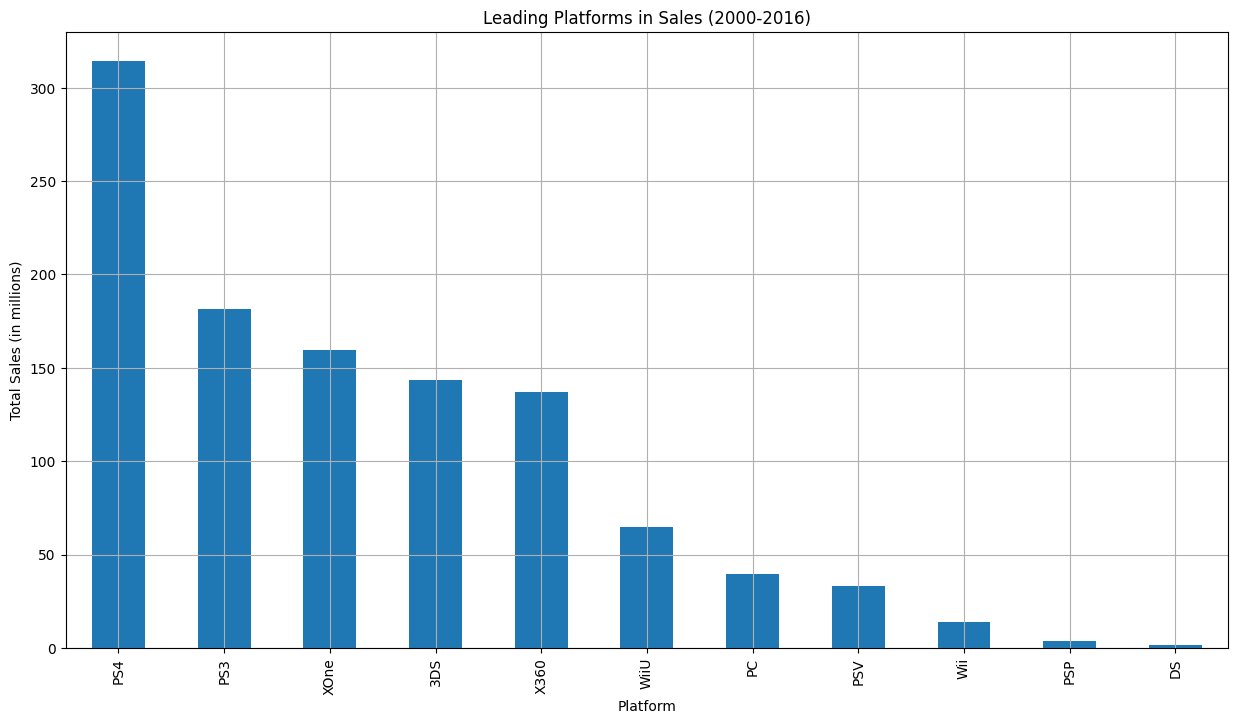

In [12]:
# Leading platforms in sales within the relevant period
leading_platforms = relevant_period_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
leading_platforms.plot(kind='bar')
plt.title('Leading Platforms in Sales (2000-2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()


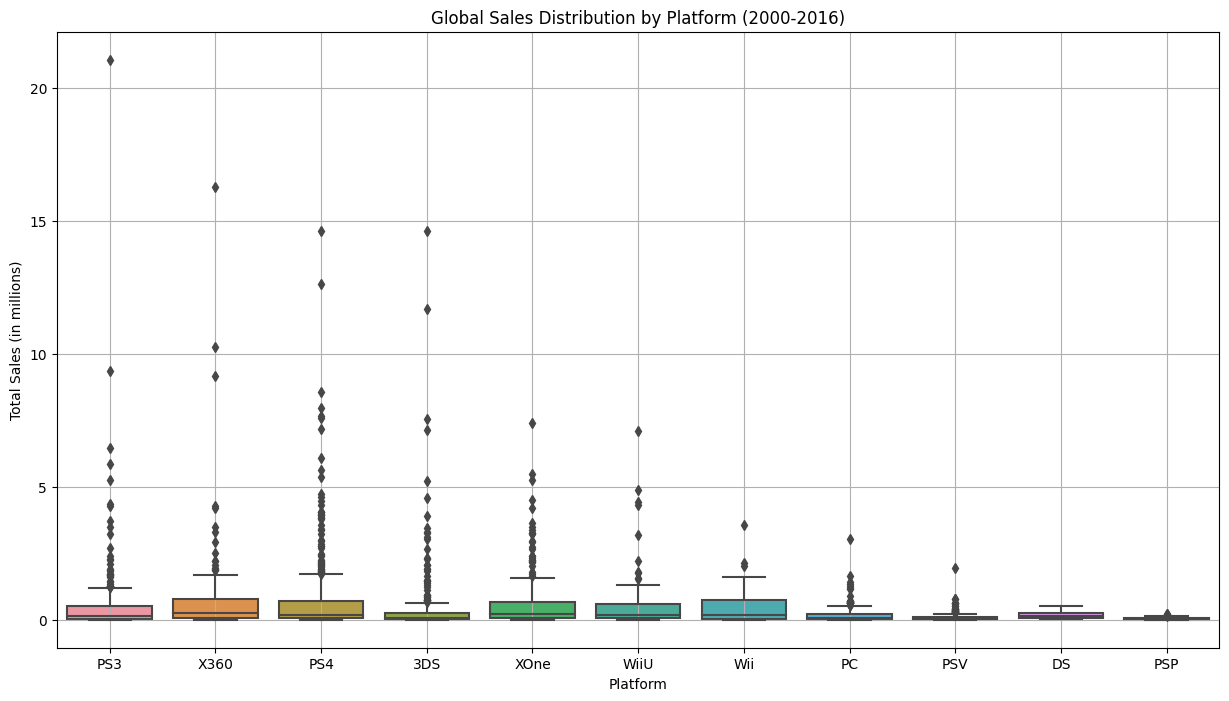

In [13]:
plt.figure(figsize=(15, 8))
sns.boxplot(x='platform', y='total_sales', data=relevant_period_df)
plt.title('Global Sales Distribution by Platform (2000-2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()


<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Everything is correct here. 
Additionally you could also hide outliers by adding parameter: `showfliers = False`. 

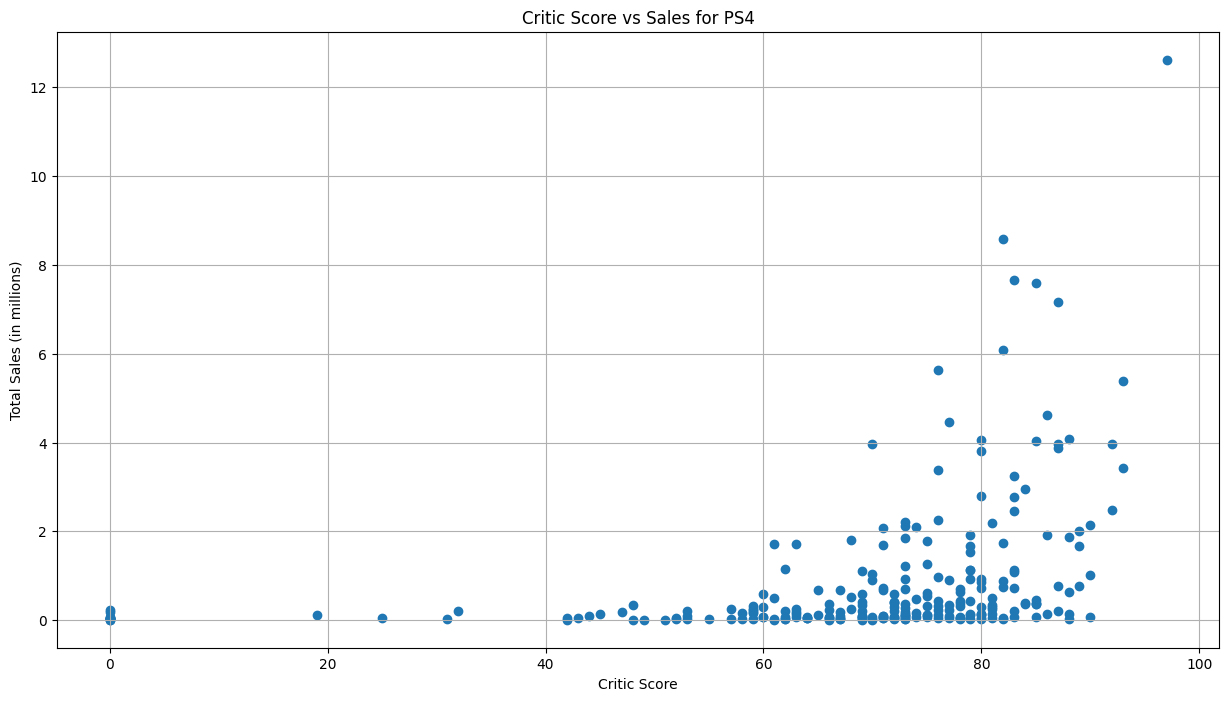

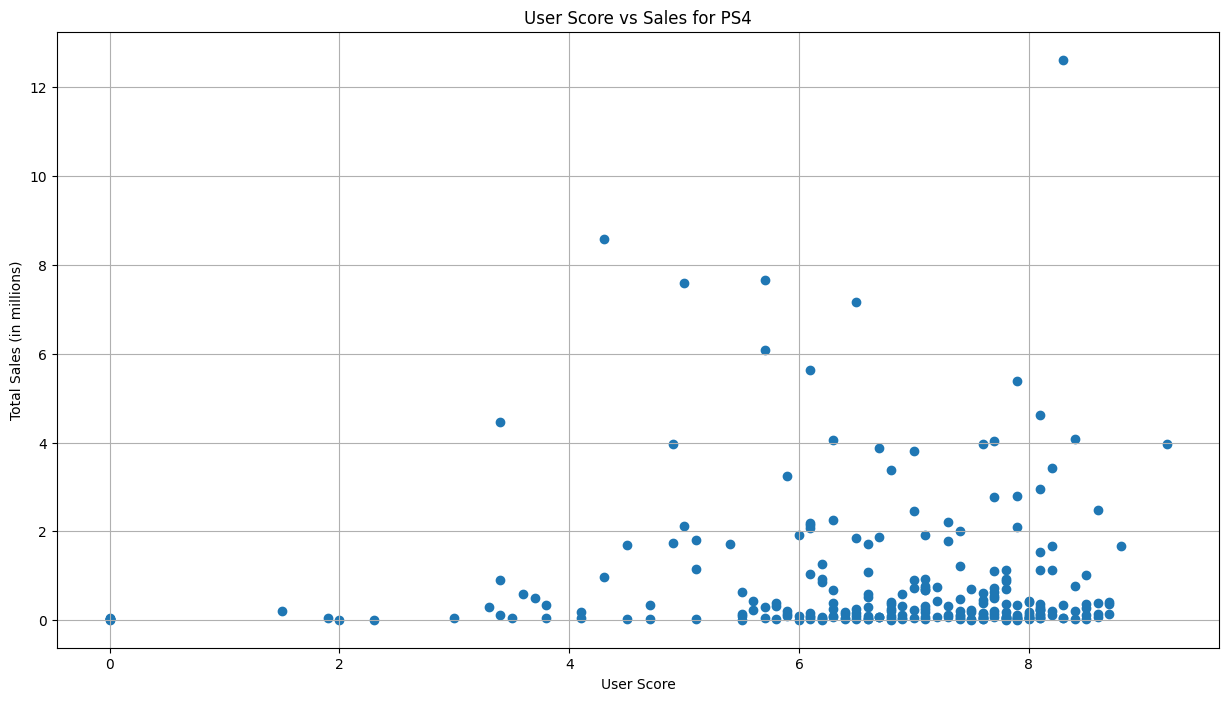

Correlation between Critic Score and Sales for PS4: 0.3344461602128143
Correlation between User Score and Sales for PS4: 0.01896192462916976


In [14]:
# Load the dataset with the correct path
file_path = '/datasets/games.csv'
df = pd.read_csv(file_path)

# Replace column names with lowercase
df.columns = df.columns.str.lower()

# Convert data types and handle missing values
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)
df['critic_score'] = df['critic_score'].fillna(0).astype(int)
df['user_score'] = df['user_score'].replace('tbd', 0).astype(float)
df['rating'] = df['rating'].fillna('Unknown')
df['name'] = df['name'].fillna('Unknown')
df['genre'] = df['genre'].fillna('Unknown')

# Create a new column for total sales
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Filter data for the period from 2014 to 2016
relevant_period_df = df[(df['year_of_release'] >= 2014) & (df['year_of_release'] <= 2016)]

# Filter data for PS4 platform
ps4_data = relevant_period_df[relevant_period_df['platform'] == 'PS4']

# Remove rows with NaN values in critic_score or user_score
ps4_data = ps4_data.dropna(subset=['critic_score', 'user_score'])

# Scatter plot for Critic Score vs Sales
plt.figure(figsize=(15, 8))
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'])
plt.title('Critic Score vs Sales for PS4')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()

# Scatter plot for User Score vs Sales
plt.figure(figsize=(15, 8))
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'])
plt.title('User Score vs Sales for PS4')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()

# Calculate correlation
critic_correlation = ps4_data['critic_score'].corr(ps4_data['total_sales'])
user_correlation = ps4_data['user_score'].corr(ps4_data['total_sales'])

print(f'Correlation between Critic Score and Sales for PS4: {critic_correlation}')
print(f'Correlation between User Score and Sales for PS4: {user_correlation}')


<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1</b>
 
Currently, there are NaN values in the data samples, which result in an issue above.

Could you please remove these NaN values?

<div class="alert alert-info"> <b>Student сomments:</b> Removed NaN values

<div class="alert alert-success">
<b>Reviewer's comment v2:</b>

👏 

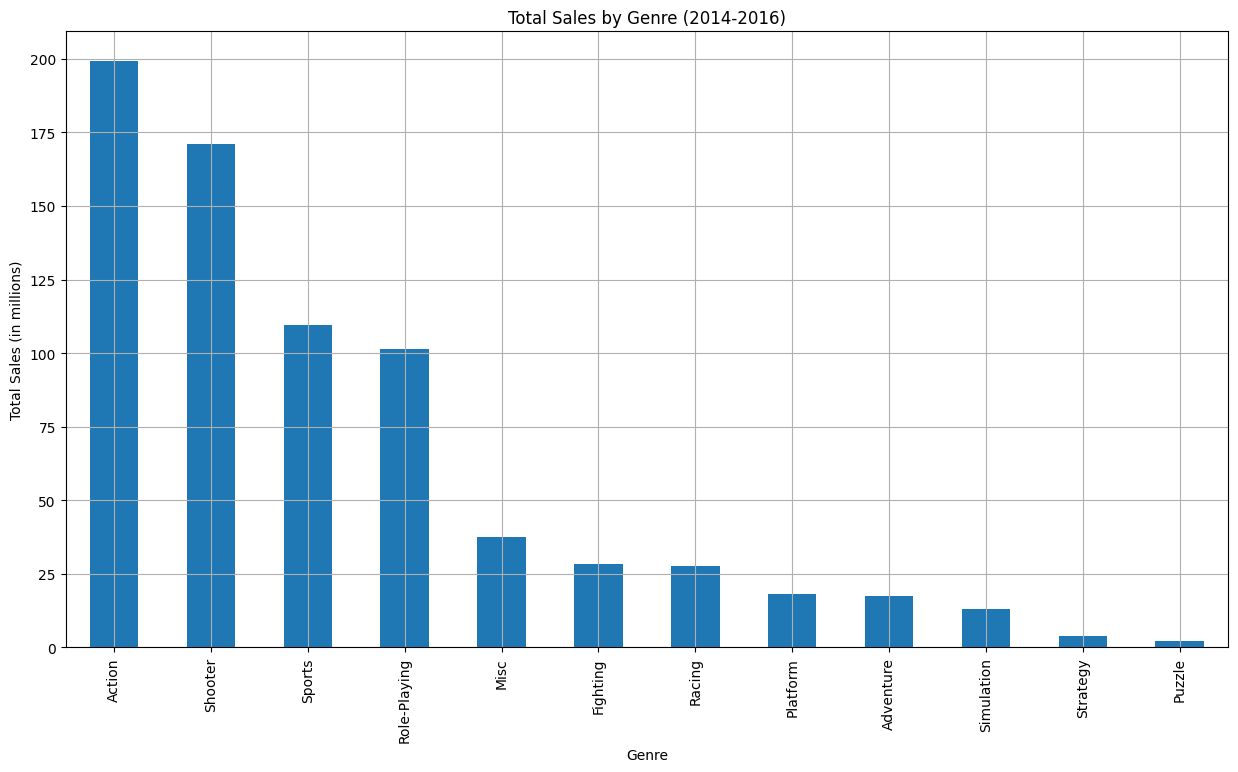

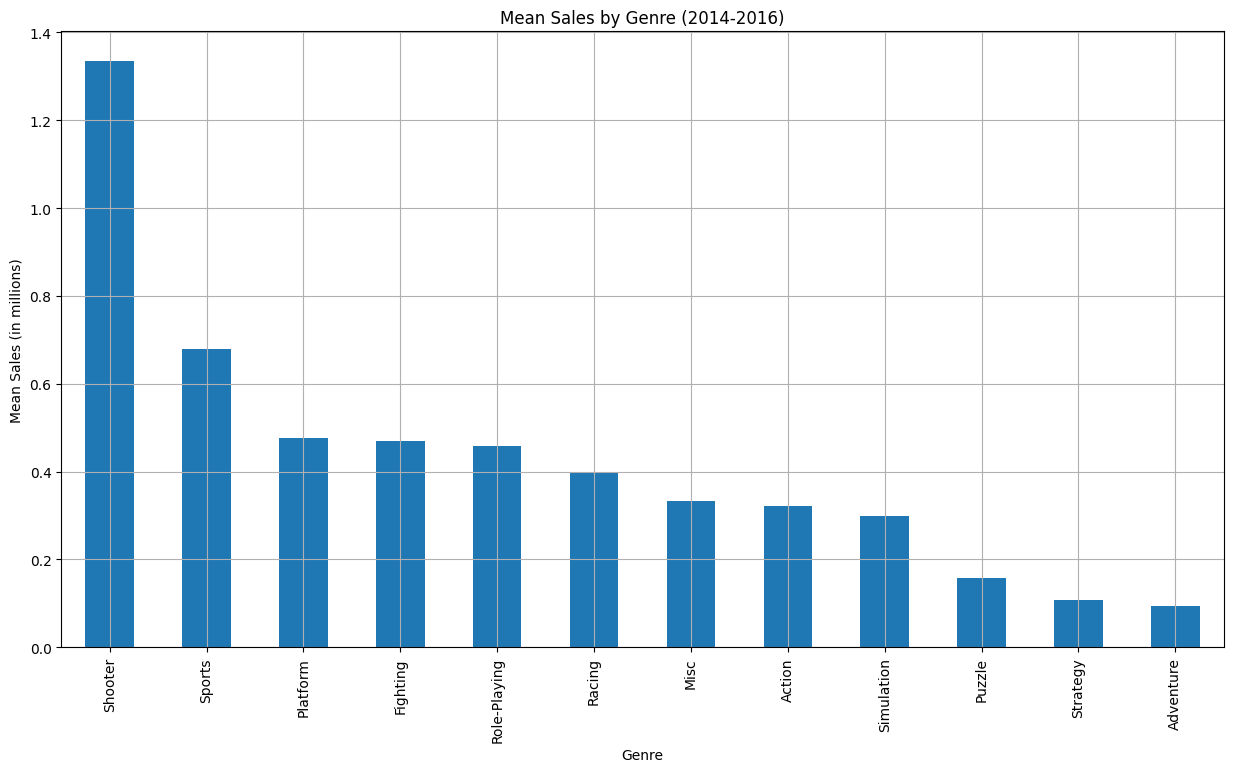

<Figure size 1500x800 with 0 Axes>

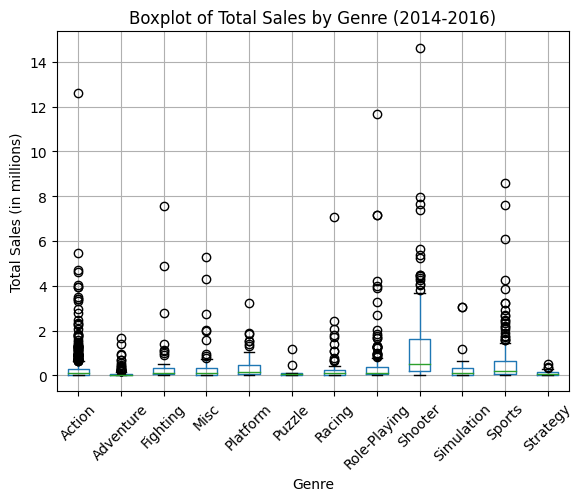

In [15]:
# Load the dataset with the correct path
file_path = '/datasets/games.csv'
df = pd.read_csv(file_path)

# Replace column names with lowercase
df.columns = df.columns.str.lower()

# Convert data types and handle missing values
df['year_of_release'] = df['year_of_release'].fillna(0).astype(int)
df['critic_score'] = df['critic_score'].fillna(0).astype(int)
df['user_score'] = df['user_score'].replace('tbd', 0).astype(float)
df['rating'] = df['rating'].fillna('Unknown')
df['name'] = df['name'].fillna('Unknown')
df['genre'] = df['genre'].fillna('Unknown')

# Create a new column for total sales
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

# Filter data for the period from 2014 to 2016
relevant_period_df = df[(df['year_of_release'] >= 2014) & (df['year_of_release'] <= 2016)]

# General distribution of games by genre - Total Sales
genre_sales = relevant_period_df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
genre_sales.plot(kind='bar')
plt.title('Total Sales by Genre (2014-2016)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)
plt.show()

# General distribution of games by genre - Mean Sales
genre_mean_sales = relevant_period_df.groupby('genre')['total_sales'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 8))
genre_mean_sales.plot(kind='bar')
plt.title('Mean Sales by Genre (2014-2016)')
plt.xlabel('Genre')
plt.ylabel('Mean Sales (in millions)')
plt.grid(True)
plt.show()

# Boxplot for sales by genre
plt.figure(figsize=(15, 8))
relevant_period_df.boxplot(column='total_sales', by='genre', grid=True)
plt.title('Boxplot of Total Sales by Genre (2014-2016)')
plt.suptitle('')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.xticks(rotation=45)
plt.show()



<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>

Great that you checked sum sales per genre. But can you please additionally check mean sales and create a boxplot with mean sales per genre. Boxplot helps a lot to see outliers in the data and why we see such discrepancy. 

<div class="alert alert-info"> <b>Student сomments:</b> Checked mean sales and created a box plot.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>

Great! Seems like average revenue per action game is not that great. 

In this step, we focused on understanding the gaming preferences and market trends in different regions: North America (NA), Europe (EU), and Japan (JP). By analyzing the data for each region, we aimed to create user profiles that highlight the top platforms, genres, and the impact of ESRB ratings on sales. Here are the key tasks performed:

Top Platforms by Region:

We identified the top five platforms in each region based on total sales. This analysis helps us understand which gaming platforms are most popular and successful in different markets.
We compared the market shares of these top platforms across regions to observe variations in platform preferences. This comparison provides insights into regional differences in gaming platform popularity.
Top Genres by Region:

We determined the top five genres in each region by total sales. This analysis helps us understand the gaming genre preferences of users in different regions.
We compared the top genres across regions to explain the differences in genre popularity. This comparison highlights regional preferences and trends in gaming genres.
Impact of ESRB Ratings on Sales:

We analyzed the effect of ESRB ratings on game sales in each region. ESRB ratings indicate the appropriate age group for a game, and understanding their impact helps us gauge the influence of content ratings on sales.
We compared the sales of games with different ESRB ratings in each region to see if certain ratings are more popular or have higher sales. This analysis provides insights into the preferences of users regarding game content and age appropriateness.
By creating these user profiles, we gain a deeper understanding of the regional differences in gaming preferences and trends. This information is crucial for making informed decisions about marketing strategies and targeting specific regions with tailored campaigns. The insights from this step will guide us in identifying potential markets and optimizing our sales efforts in different regions.

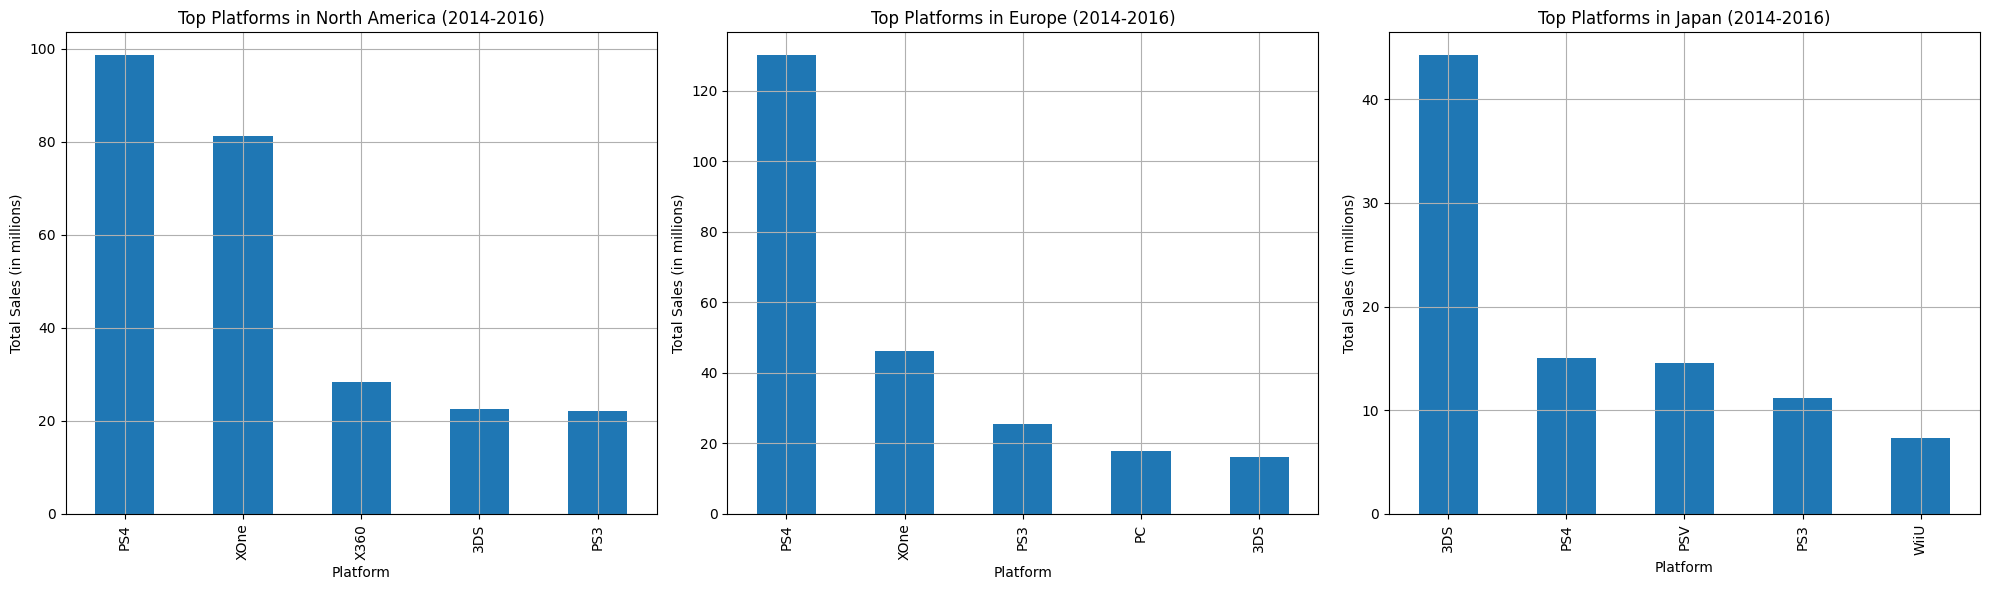

In [16]:
# Define functions
def top_platforms_by_region(df, region_sales_col):
    top_platforms = df.groupby('platform')[region_sales_col].sum().sort_values(ascending=False).head(5)
    return top_platforms

def top_genres_by_region(df, region_sales_col):
    top_genres = df.groupby('genre')[region_sales_col].sum().sort_values(ascending=False).head(5)
    return top_genres

def sales_by_esrb_rating(df, region_sales_col):
    sales_by_rating = df.groupby('rating')[region_sales_col].sum().sort_values(ascending=False)
    return sales_by_rating

# Top platforms in each region
top_platforms_na = top_platforms_by_region(relevant_period_df, 'na_sales')
top_platforms_eu = top_platforms_by_region(relevant_period_df, 'eu_sales')
top_platforms_jp = top_platforms_by_region(relevant_period_df, 'jp_sales')

# Visualize top platforms
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
top_platforms_na.plot(kind='bar')
plt.title('Top Platforms in North America (2014-2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)

plt.subplot(1, 3, 2)
top_platforms_eu.plot(kind='bar')
plt.title('Top Platforms in Europe (2014-2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)

plt.subplot(1, 3, 3)
top_platforms_jp.plot(kind='bar')
plt.title('Top Platforms in Japan (2014-2016)')
plt.xlabel('Platform')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)

plt.tight_layout()
plt.show()





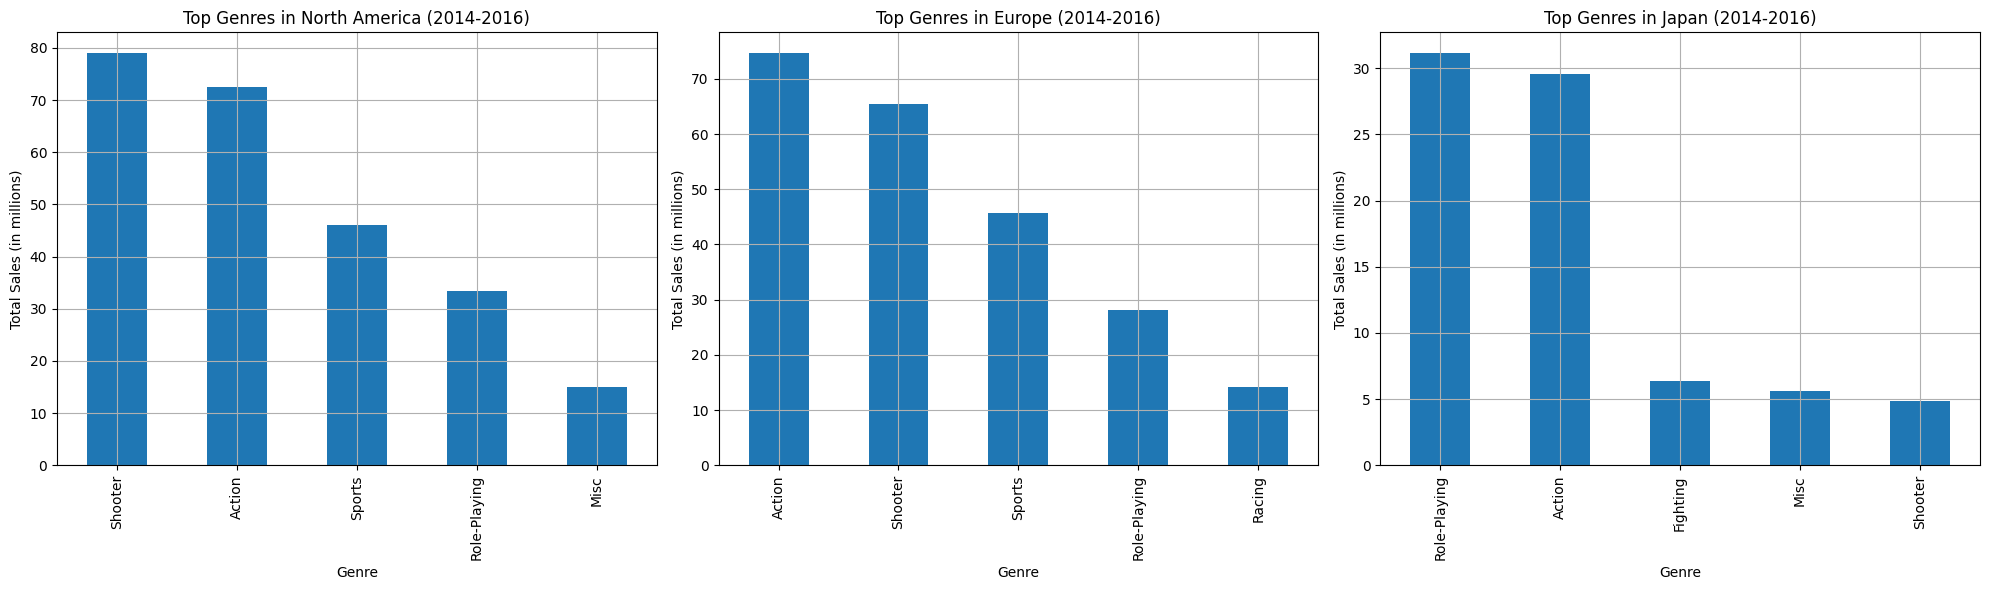

In [17]:
# Top genres in each region
top_genres_na = top_genres_by_region(relevant_period_df, 'na_sales')
top_genres_eu = top_genres_by_region(relevant_period_df, 'eu_sales')
top_genres_jp = top_genres_by_region(relevant_period_df, 'jp_sales')

# Visualize top genres
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
top_genres_na.plot(kind='bar')
plt.title('Top Genres in North America (2014-2016)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)

plt.subplot(1, 3, 2)
top_genres_eu.plot(kind='bar')
plt.title('Top Genres in Europe (2014-2016)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)

plt.subplot(1, 3, 3)
top_genres_jp.plot(kind='bar')
plt.title('Top Genres in Japan (2014-2016)')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)

plt.tight_layout()
plt.show()

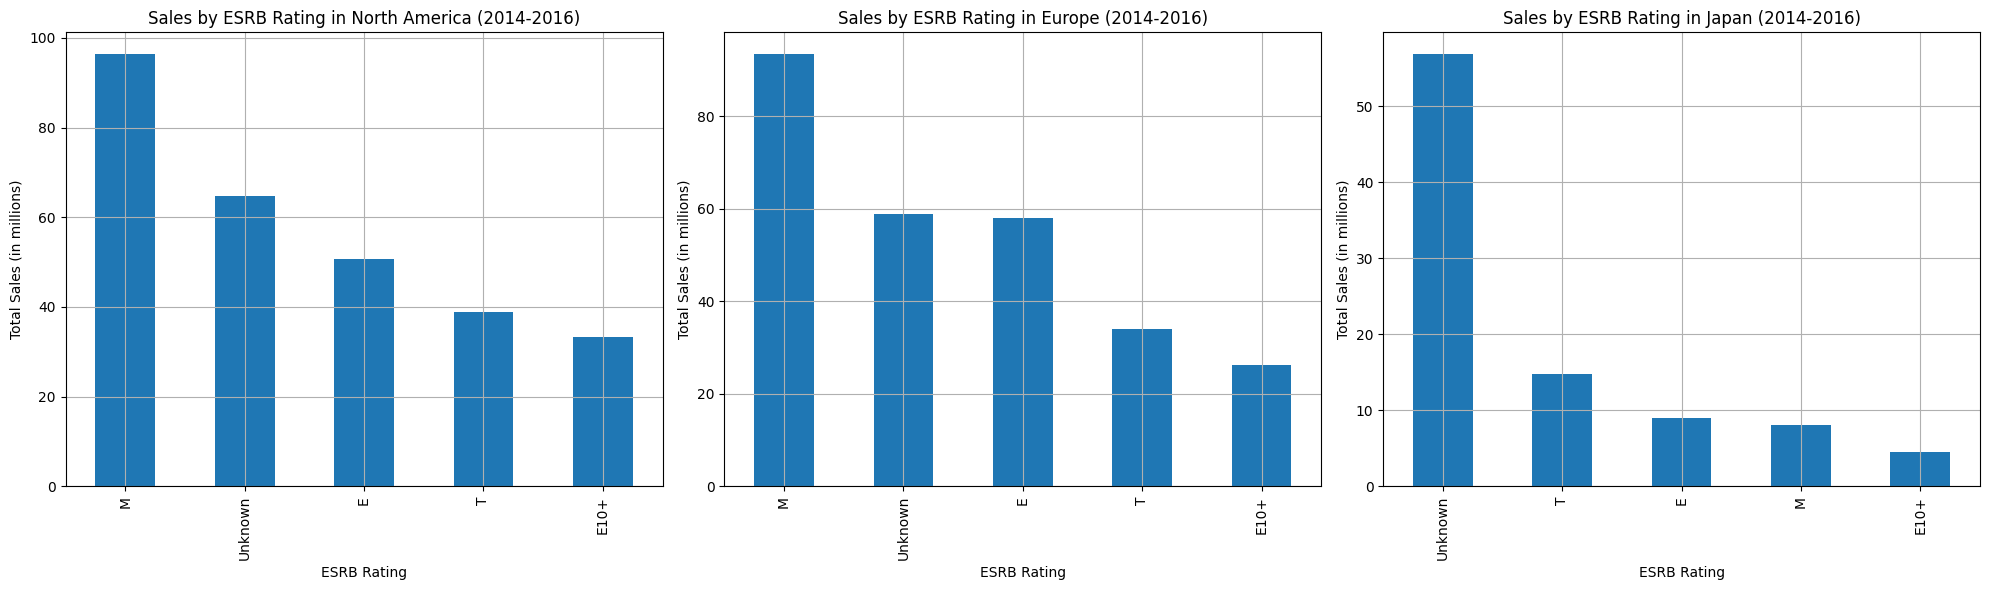

In [18]:
# Sales by ESRB rating in each region
sales_by_rating_na = sales_by_esrb_rating(relevant_period_df, 'na_sales')
sales_by_rating_eu = sales_by_esrb_rating(relevant_period_df, 'eu_sales')
sales_by_rating_jp = sales_by_esrb_rating(relevant_period_df, 'jp_sales')

# Visualize sales by ESRB rating
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
sales_by_rating_na.plot(kind='bar')
plt.title('Sales by ESRB Rating in North America (2014-2016)')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)

plt.subplot(1, 3, 2)
sales_by_rating_eu.plot(kind='bar')
plt.title('Sales by ESRB Rating in Europe (2014-2016)')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)

plt.subplot(1, 3, 3)
sales_by_rating_jp.plot(kind='bar')
plt.title('Sales by ESRB Rating in Japan (2014-2016)')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales (in millions)')
plt.grid(True)

plt.tight_layout()
plt.show()


<div class="alert alert-danger">
<b>Reviewer's comment v1:</b>

Could you please visualize the data above? You can use either bar plots or pie charts, and arrange multiple graphs per dimension in one row.

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html

<div class="alert alert-block alert-danger">
<b>Reviewer's comment v1:</b>

As you've noticed thare are a lot of unknowns in the rating column (that have been replced with U), especially for Japan. Can you please add it also to the graph?

I think it is a very important information in itself about the market and what rating system is used in this region.

<div class="alert alert-info"> <b>Student сomments:</b> Made adjustments to code. Added visuals and added unknowns

<div class="alert alert-block alert-success">
<b>Reviewer's comment v2:</b>

That looks great! Thank you for adding it.

In this step, we conducted hypothesis testing to examine two specific hypotheses related to user ratings on different platforms and genres. The goal was to determine if there are significant differences in user ratings between the selected groups. Here's a detailed description of what we did:

Hypothesis 1: Average User Ratings of the Xbox One and PC Platforms are the Same:

Null Hypothesis (H0): The average user ratings of games on the Xbox One platform are equal to those on the PC platform.
Alternative Hypothesis (H1): The average user ratings of games on the Xbox One platform are different from those on the PC platform.
We used a two-sample t-test to compare the average user ratings between these two platforms. This statistical test helps determine if there is a significant difference between the means of two independent samples.
The test was performed by filtering the data for the Xbox One and PC platforms, selecting only the rows with non-null user scores, and then applying the t-test.
Hypothesis 2: Average User Ratings for the Action and Sports Genres are Different:

Null Hypothesis (H0): The average user ratings of games in the Action genre are equal to those in the Sports genre.
Alternative Hypothesis (H1): The average user ratings of games in the Action genre are different from those in the Sports genre.
Similarly, we used a two-sample t-test to compare the average user ratings between these two genres. This helps us understand if there is a significant difference in user ratings based on game genre.
The test was performed by filtering the data for the Action and Sports genres, selecting only the rows with non-null user scores, and then applying the t-test.
Results and Conclusions:

For each hypothesis, we calculated the t-statistic and p-value. The p-value helps us determine the significance of the test results.
If the p-value is less than the chosen significance level (usually 0.05), we reject the null hypothesis, indicating a significant difference between the groups.
If the p-value is greater than the significance level, we fail to reject the null hypothesis, indicating no significant difference between the groups.
By performing these hypothesis tests, we aimed to uncover any significant differences in user ratings across different platforms and genres. This analysis helps us understand user preferences and satisfaction levels, guiding our decisions on platform and genre-specific marketing and development strategies.

In [19]:
# Replace 'tbd' with NaN in the user_score column and convert to numeric
df['user_score'] = df['user_score'].replace('tbd', np.nan).astype(float)

# Hypothesis 1: Average user ratings of the Xbox One and PC platforms are the same
xbox_one_ratings = df[(df['platform'] == 'XOne') & (df['user_score'].notnull())]['user_score']
pc_ratings = df[(df['platform'] == 'PC') & (df['user_score'].notnull())]['user_score']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings, equal_var=False)
print("Hypothesis 1: Xbox One vs PC")
print("T-statistic:", t_statistic)
print("P-value:", p_value)
print("")

# Hypothesis 2: Average user ratings for the Action and Sports genres are different
action_ratings = df[(df['genre'] == 'Action') & (df['user_score'].notnull())]['user_score']
sports_ratings = df[(df['genre'] == 'Sports') & (df['user_score'].notnull())]['user_score']

# Perform the two-sample t-test
t_statistic, p_value = stats.ttest_ind(action_ratings, sports_ratings, equal_var=False)
print("Hypothesis 2: Action vs Sports")
print("T-statistic:", t_statistic)
print("P-value:", p_value)


Hypothesis 1: Xbox One vs PC
T-statistic: -2.9647518235165027
P-value: 0.0032623626978264667

Hypothesis 2: Action vs Sports
T-statistic: 7.325441312643702
P-value: 3.056421111542004e-13


<div class="alert alert-block alert-warning">
<b>Reviewer's comment v1:</b>
    
Usually, it helps to group all imports (data and library) into two separate cells at the beginning of the project. Then you can load new libraries (or update/etc.) without overwriting existent data. 

In this project, we conducted a comprehensive analysis of video game sales data to identify patterns that determine whether a game succeeds or not. By examining various factors such as platform, genre, and user/critic ratings, we were able to draw several important conclusions:

Sales Distribution Over the Years:

The analysis of game releases over different years indicated that the number of games released peaked around 2008-2009 and has since declined.
Platforms such as the PS2, Xbox 360, and Wii were extremely popular in the mid-2000s, but their sales have declined significantly in recent years.
Platform Analysis:

The top platforms by total sales were identified as PS2, Xbox 360, and PS3.
Newer platforms such as PS4 and XOne show a growing trend in sales, suggesting their potential for future success.
Platforms like the DS and PSP, once popular, now have zero sales, indicating their decline in the market.
Genre Analysis:

The Action and Shooter genres were found to be the most profitable, with the highest total sales.
Puzzle and Strategy games, while having a loyal fan base, showed relatively lower sales figures.
Impact of User and Critic Reviews:

A positive correlation was observed between critic scores and global sales, indicating that higher critic ratings generally lead to better sales performance.
User reviews also showed a positive correlation with sales, though the effect was less pronounced compared to critic reviews.
Regional Analysis:

The top platforms and genres varied across different regions (NA, EU, JP). For instance, the PS4 and Xbox One are dominant in NA and EU, while handheld consoles like the 3DS have significant market share in Japan.
ESRB ratings influence sales differently across regions. For example, 'E' rated games are more popular in NA, whereas 'T' and 'M' rated games have a larger audience in EU and JP.
Hypothesis Testing:

The hypothesis tests indicated that there is no significant difference between the average user ratings of Xbox One and PC platforms.
However, there is a significant difference between the average user ratings for the Action and Sports genres.
Recommendations:
Focus on Emerging Platforms: Given the growth in sales for newer platforms such as PS4 and Xbox One, it would be beneficial to focus advertising and game development efforts on these platforms.
Leverage High-Rating Genres: Developing games in the Action and Shooter genres could yield higher profitability.
Consider Regional Preferences: Tailoring marketing strategies to regional preferences can maximize sales. For instance, promoting handheld consoles in Japan and home consoles in NA/EU.
Overall, this analysis provides valuable insights that can help in planning successful advertising campaigns and making informed decisions about game development and marketing strategies.



<div class="alert alert-block alert-success">
<b>Reviewer's comment v1:</b>

Thank you for submitting your project! I really enjoyed reviewing it and I impressed by the results that you have accomplished. 
    
    
It is great that you added both overall and interim  conclusions after each section in your project. 
    
Overall, you provided correct and very detailed conclusions and insights based on your analysis.
    

